# Specviz Demonstration Notebook
This notebook demonstrates the Specviz API in the Notebook setting. UI equivalents for these actions, as well as additional documentation about Specviz, can be found here: https://jdaviz.readthedocs.io/en/latest/specviz/

## Guided Tour
When you load Specviz (and some data), you'll see the following screen appear below!
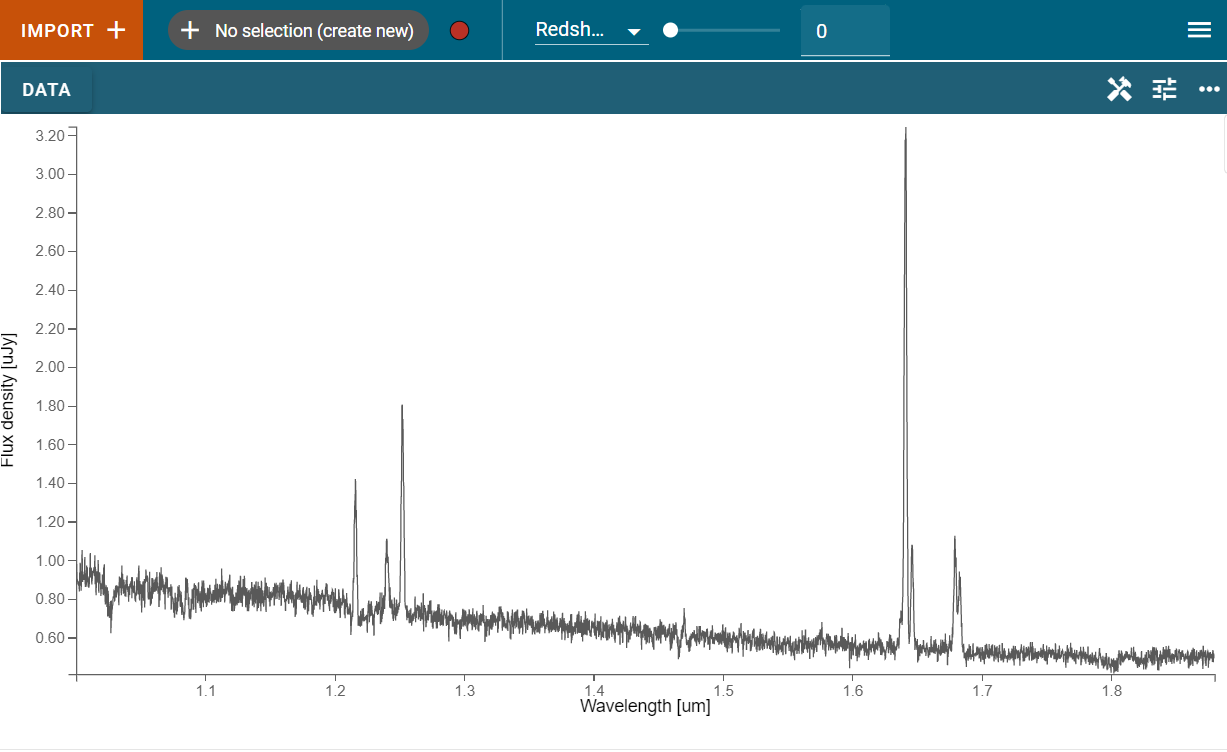

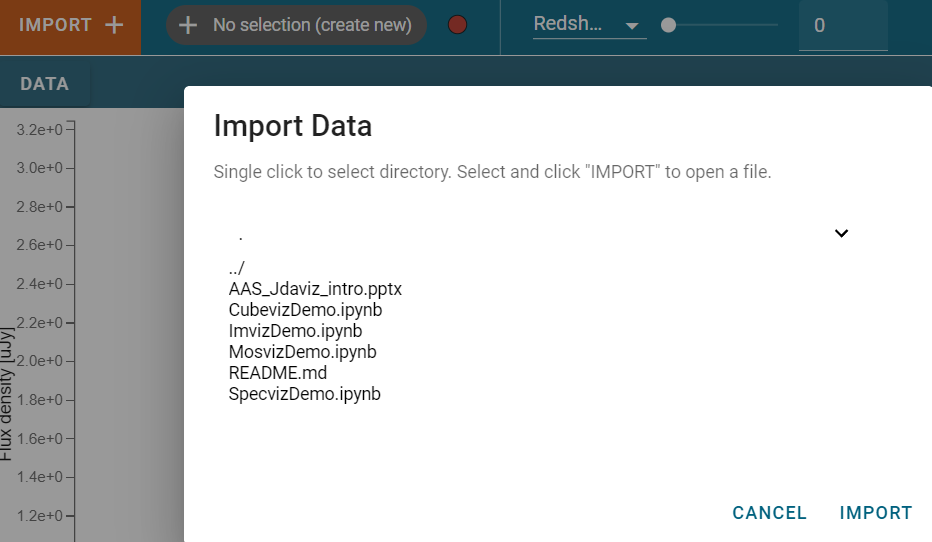
In the top left, you'll find the `Import` button, allowing you to load your datafile directly from within Specviz. You can also load data from the API.

The following two tools are the "Subset Selection" tool, and the "Redshift Slider" tool (unique to Specviz). These will be described below.

In the center, you'll see the `spectrum viewer` that visualizes the loaded spectrum, above which, you'll find the viewer toolbar, which includes four main dropdowns.

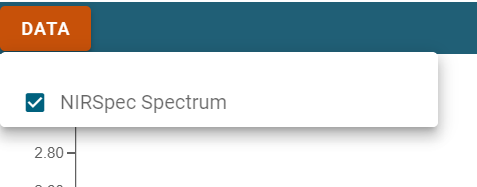
In the `DATA` dropdown, you'll find all the data you've loaded into the viewer. In addition, any new data generated, including models, unit-converted data, and collapsed data (such as in Cubeviz), will appear here as well. 

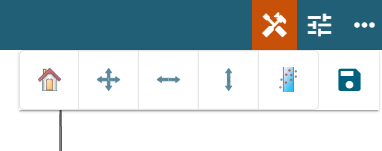
The `Viewer Tools` dropdown includes some tools to operate on this specific viewer. Included in the list (from left to right) are:
* "Home" reset: Resets the view to the original zoom and stretch
* Bidirectional Pan/Zoom
* Horizontal Pan/Zoom
* Vertical Pan/Zoom
* Subset Selection
* Screenshot Tool

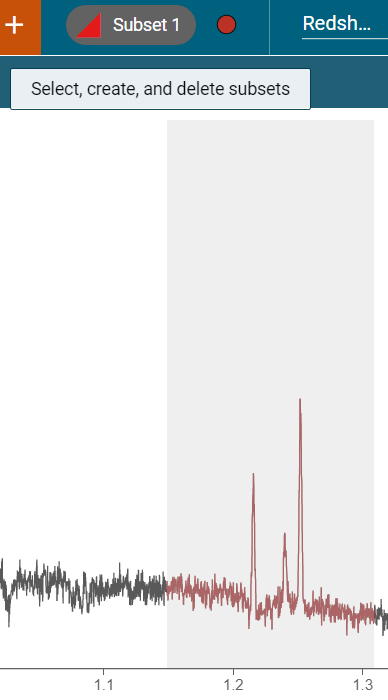
By using the `Subset Selection` tool, you can draw a region of interest in the spectrum viewer. A subset will be generated and added to the `Subset Registry` at the top of the app. To move the region around, click and drag the grey highlighted region. To finalize the selection, click off of the region, and the grey highlight will disappear.

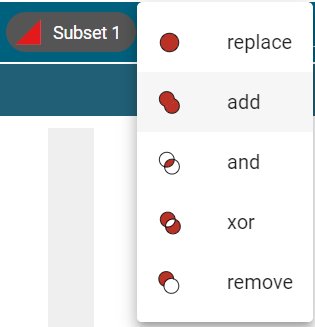
 The registry will also show the **active** subset selected that will be operated on. To modify this subset, you can change the `selection` tool on the right side. For example, by selecting "add", new regions drawn by the `Subset Selection` tool will be added to the selected `Subset 1`

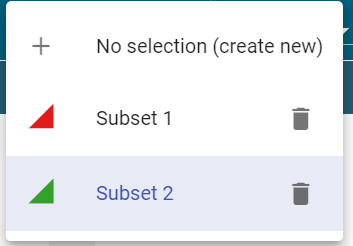
When opening the `Subset Registry`, you can find all the subsets currently defined in the viewer. To create a new subset, you can select "Create New"

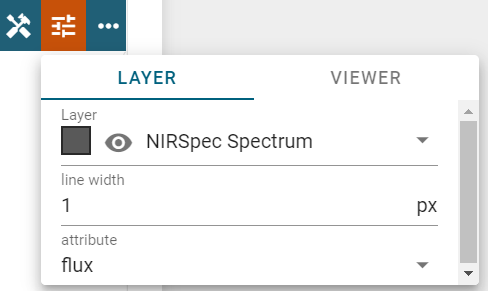
The `Display Tuner` dropdown contains options to change how data appears on the screen (including color, thickness, visibility, contrast, bias, etc.)

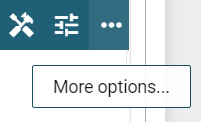
`Other` options will be included in the last dropdown. Currently, none exist for Specviz. 

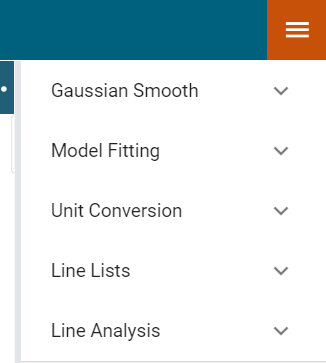
Additional functionality can be found in the `Plugin Tray` in the top right corner. These plugins provide various data analysis functionalities in them. Included in Specviz, at the time of writing:
* Gaussian Smooth: Apply a gaussian smooth over your data
* Model Fitting: Fit a model, models, and/or compound models to your data or a spectral subset
* Unit Conversion: Generate a new dataset with different units from the original
* Line List: Display spectral lines atop the spectrum
* Line Analysis: Provide statistics of a specific line selected within a subset

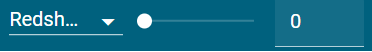
The `Redshift Slider` is the last tool in the `app-level toolbar`. It shifts all spectral lines visualized in the `spectral viewer` by the value specified by the user. The slider intelligently sets the range based on the value input by the user. If you are having difficulties adjusting the value due to the slider range, enter the "ballpark" or "order of magnitude" value in the textbox, and the slider will adjust accordingly

# Guided Exercise
The following is a guided exercise to identify some spectral lines in an included, simulated JWST NIRSpec spectrum

# Objective 1: Display Spectrum in Specviz
## Setup

In [ ]:
import astropy.units as u

In [ ]:
# Suppress warnings
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

## Create Specviz via Helper

In [ ]:
from jdaviz import Specviz
specviz = Specviz()

## Display Specviz

In [ ]:
specviz.app

## Load a file to Specviz

In [ ]:
from astropy.utils.data import download_file
fn = download_file('https://stsci.box.com/shared/static/llbr4w8ucqpz6g81hi41v4tnszwi3bq4.fits', cache=True)
specviz.load_spectrum(fn, "NIRSpec Spectrum")

# Objective 2: Identify a Spectral Line

In [ ]:
# Redisplay Specviz for convenience
specviz.app

## Load Line Lists
We can leverage Specviz's integrated lists of pre-identified lines to help us identify our line feature. The line list functionality is located within the ["Line Lists" plugin in the plugin tray](https://jdaviz.readthedocs.io/en/latest/specviz/plugins.html#line-lists)

*HINT*: Hb, OIII, NII, Ha, and SII nebular lines are present in this particular spectrum

You can also load a custom line list manually via the API using astropy's QTable:

In [ ]:
from astropy.table import QTable
import astropy.units as u

custom_linelist = QTable()
custom_linelist['linename'] = ['Hbeta', 'O III (1)', 'O III (2)','N II (1)', 'Halpha', 'N II (2)', 'S II (1)', 'S II (2)']
custom_linelist['rest'] = [4851.3, 4959, 5007, 6584, 6563, 6563, 6584, 6719]*u.AA
custom_linelist['redshift'] = u.Quantity(1.5)
custom_linelist['listname'] = "AAS 239 Example Line List"

specviz.load_line_list(custom_linelist)
specviz.spectral_lines

## Redshift Slider
As a hint, this spectrum is redshifted. To adjust the plotted spectral lines to the correct redshift, you can drag the [redshift slider](https://jdaviz.readthedocs.io/en/latest/specviz/redshift.html) located at the top of the tool, or enter in a value manually.

# Objective 3: Fit a model to the line
Now that we have identified the line, we can try to fit a model to it using the included [Model Fitting capabilities of Specviz](https://jdaviz.readthedocs.io/en/latest/specviz/plugins.html#model-fitting)


In [ ]:
# Redisplay Specviz for convenience
specviz.app

## Visually pan to a spectral feature
The first step is to visually identify the spectral feature. You can pan and zoom using one of our included viewer tools, or you can use the methods x_limits() and y_limits() to modify the field of view of Specviz. You can provide these methods a scalar (which assumes the units of the loaded spectra), an Astropy Quantity, or 'auto' to automatically scale.

In [ ]:
specviz.x_limits(1.63*u.um,1.66*u.um)
specviz.y_limits(0.45, 'auto')

## Selecting the line as a region
The first step to fitting a model to the line is [defining the spectral region](https://jdaviz.readthedocs.io/en/latest/specviz/displaying.html#defining-spectral-regions) across which the model will be fit. To do this, select the line using our `region select` tool in the viewer toolbox.

### Subset Retrieval
As a quick aside, after defining regions in your spectra, you can retrieve your subsets through different means. To retrieve your subset by name:

In [ ]:
# Retrieved the spectral regions defined:
specviz.get_spectral_regions()

To extract the segment of the spectrum along the spectral region we just defined, you can retrieve it below:

In [ ]:
# Returns a version of the whole spectra, with a mask applied
specviz.get_spectra('Subset 1')

## Model fitting
To actually fit the spectrum in this spectral region, open the `Model Fitting` plugin from the plugin tray. Select our NIRSpec data and our Spectral Region we defined, and define the appropriate models for this region. In this example, we'll plot a simple gaussian model to the feature. Computing the model will automatically overplot the resulting fit over our spectrum.

## Model Retrieval:
Once we have our model, we can [extract our model](https://jdaviz.readthedocs.io/en/latest/notebook/export_data.html#export-model-and-model-parameters) it out by calling:

In [ ]:
# Retrieve our fitted model
specviz.get_models()

You can also retrieve the model's parameters below:

In [ ]:
# Retrieve the parameters from which our model was constructed:
# TODO: Currently broken. Bug reported: https://github.com/spacetelescope/jdaviz/issues/975
specviz.get_model_parameters(model_label="Model")

This concludes the Specviz demonstration notebook.
# Thank you!
Thank you for attending Space Telescope Science Institute's Data Analysis Tools Workshop at the 239th Meeting of the American Astronomical Society! We hope you found this session informative and our tools useful for your analysis.

* Documentation: https://jdaviz.readthedocs.io/
* GitHub: https://github.com/spacetelescope/jdaviz
* Report an issue directly to us: https://github.com/spacetelescope/jdaviz/issues/new/choose
* JWST Help Desk: https://stsci.service-now.com/jwst